# STA 208: Homework 1
This is based on the material in Chapters 2, 3 of 'Elements of Statistical Learning' (ESL), in addition to lectures 1-4.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

# 1. Conceptual Exercises

__Exercise 1.1.__ (5 pts) Recall that the Hamming loss for Binary classification ($y \in \{0,1\}$) is 
$$l(y,\hat y) = 1\{y \ne \hat y\} = (y - \hat y)^2$$
as long as $\hat y \in \{0,1\}$.
This loss can be extended to multiclass classification where there are $K$ possible values that $y$ can take (for example 'dog','cat','squirrel' or 1-5 stars).  Explain how you can re-encode $y$ and $\hat y$ to be a $K-1$ dimensional vector that generalizes binary classification, and rewrite the loss using vector operations.



__Solution__

Let the $K$ possible values be indexed by the set $\{0,1,\ldots, K-1 \}$.

Assign the corresponding $K-1$-dimentional vectors as follows:

$v_1 = (1,0,\ldots,0), \quad v_2 = (0,1,\ldots,0),\quad \ldots, \quad v_{K-1} = (0,0,\ldots,1)\ $ and $\ v_0 = \alpha (1,1,\ldots,1)$, 

where we choose $\alpha$ so that $||v_1 - v_0 ||_2^2 = ||v_1 - v_2 ||_2^2 = 2$.

One such value of $\alpha$ is $-\frac{1}{\sqrt{K}+1}$.

Thus, the distances between vectors are the same and the loss function can be generalized as

$$ l(y_i,\hat y) = ||v_i - \hat y ||_2^2. $$

__Exercise 1.2__ (5 pts) Ex. 2.7 in ESL

__Solution__

__Part a.__
In linear regression $\hat f(x_0) = \tilde x_0 \hat \beta$, where $\tilde x_0$ has 1 as 0-th component, and has the same components as $x_0$ in other positions.

Using the datapoints $(X,Y)$, the LSE for $\beta$ is $\hat\beta = \big(\tilde X^T \tilde X\big)^{-1} \tilde X^T Y$, so $$\hat f(x_0) = \tilde x_0 \big(\tilde X^T \tilde X\big)^{-1} \tilde X^T Y = \sum l_i(x_0; X) y_i,$$ with $l_i(x_0; X)$ is equal to $i$-th component of vector $\tilde x_0 \big(\tilde X^T \tilde X\big)^{-1} \tilde X^T$. 

In kNN, the estimator is $\hat f(x_0) = \sum l'_i(x_0; X) y_i,$ where $l'_i(x_0; X) = l'_i(x_0; x_1,x_2,\ldots,x_n) = \frac{1}{k} \mathbf{1}\big(x_i \text{ is among } k\text{ nearest neighbours of } x_0\big)$.

__Part b.__
$$E_{Y|X} \big(f(x_0) - \hat f(x_0)\big)^2 = E_{Y|X} \big(\hat f(x_0) - E_{Y|X} \hat f(x_0)\big)^2 + E_{Y|X} \big(f(x_0) - E_{Y|X} \hat f(x_0)\big)^2 = \text{Variance}_{|X} + \text{Bias}_{|X}.$$
We can calculate those directly:
$$\text{Variance}_{|X} = E_{Y|X} \big(\hat f(x_0) - E_{Y|X} \hat f(x_0)\big)^2 = E_{|X} \big(\sum l_i(x_0;X) (f(x_i) + \epsilon_i) - \sum l_i(x_0;X) f(x_i)\big)^2 = \sum l_i^2(x_0;X) \sigma^2,$$
and
$$\text{Bias}_{|X} = E_{Y|X} \big(E_{Y|X} \hat f(x_0) - f(x_0)\big)^2 = \big(\sum l_i(x_0;X) f(x_i) - f(x_0)\big)^2.$$

__Part c.__
$$E_{X,Y} \big(f(x_0) - \hat f(x_0)\big)^2 = E_X E_{Y|X} \big(f(x_0) - \hat f(x_0)\big)^2 = E_X \text{Variance}_{|X} + E_X \text{Bias}_{|X} = \text{Variance} + \text{Bias}. $$
Using results from the last part,
$$\text{Variance} = \sigma^2 \sum E_X l_i^2(x_0;X) = \sigma^2 \sum_i \int l_i^2(x_0;\bar X) h(\bar X) d\bar X, $$ where $h(\bar X) = \Pi_i \ h(x_i)$. Also,
$$\text{Bias} = E_X \big(\sum l_i(x_0;X) f(x_i) - f(x_0)\big)^2.$$

__Part d.__
From part b, in order to reduce variance, we need to reduce the $l_2$ norm of the coefficients $l_i (x_0;X)$ (for example, increase $k$ in kNN). That tipically means distributing weights between $y_i$'s more evenly. On the other hand, the bias would increase since we include more and more values $y_i$, which might be far away from the value of $y = f(x_0) + \epsilon$, which we want to estimate.

__Exercise 1.3__ (5 pts, 1 for each part) Recall that the true risk for a prediction function, $f$, a loss function, $\ell$, and a joint distribution for $Y,X$ is 
$$R(f) = E \ell(y,f(x))$$
For a training set $\{x_i,y_x\}_{i=1}^n$, the empirical risk is 
$$R_n = \frac{1}{n} \sum_{i=1}^n \ell(y_i,f(x_i)).$$
Let $y = x^\top \beta + \epsilon$ be a linear model for $Y|X$, where $x,\beta$ are $p$-dimensional such that $\epsilon$ is Gaussian with mean 0 and variance $\sigma^2$ (independent of X).
Let $\ell(y,\hat y) = (y - \hat y)^2$ be square error loss.

1. Show that $f^\star(x) = x^\top \beta$ gives the smallest true risk (also known as the Bayes rule).
1. Why can't we use this prediction in practice?
1. Recall that OLS is the empirical risk minimizer for linear functions.  Why does this tell us the following:
$$ E R_n (\hat f) \le R(f^\star)$$
1. How do we know that $E R_n (\hat f) \le R(\hat f)$? and use this to answer Ex. 2.9 in ESL.  
1. What about this was specific to OLS and least squares loss (can this be generalized)?  What is the most general statement that you can think of that you can prove in this way?

__Solution__

1. We want to minimize the true loss function $R(f)$ over all prediction functions $f$. Notice that $$R(f) = E_X E_{Y|X} (x^T \beta + \epsilon - f(x))^2.$$ Minimizing the conditional expectation point-wise would give us the optimal value of $f(x)$. Since $$E(\epsilon - a)^2 \geq E(\epsilon - E \epsilon)^2 = E\epsilon^2,$$ the minimum of $E_{Y|X} (x^T \beta - f(x) + \epsilon)^2$ is achieved when $x^T \beta - f(x) = 0$, and thus $f(x) = x^T \beta$.

2. We can't use this prediction function since we don't know the true value of the parameter $\beta$ from the noisy outputs $y_i$.

3. Note that $$E_{Y|X}R_n(f^\star) = \frac{1}{n} \sum E_{Y|X}(y_i - f^\star (x_i))^2 = E\epsilon^2 = \sigma^2 = R(f^\star).$$
Since $\hat f$ minimizes $E_{Y|X}R_n(f)$ pointwise, $E_{Y|X}R_n(\hat f) \leq E_{Y|X}R_n(f^\star)$ and thus $$E R_n(\hat f) = E_X E_{Y|X}R_n(\hat f) \leq E_X E_{Y|X}R_n(f^\star) = R(f^\star).$$

4. Since $f^\star$ minimizes $R$, we know that $R(f^\star) \leq R(\hat f)$. Combining that with inequality from the last part, $E R_n (\hat f) \le R(\hat f)$.
For Ex. 2.9, let $X$ be the set of training data. Then conditionally with respect to $X$,
$$E[R_{te} (\hat\beta)]= E \frac{1}{M} \sum (\tilde y_i - \hat\beta \tilde x_i)^2 = E_{y,x} (y - \hat\beta x)^2 = R(\hat f),$$
where $\hat f = x^T \hat \beta$. Also, $E[R_{tr} (\hat\beta)] = E R_N (\hat f)$.
Since inequality $E R_n (\hat f) \le R(\hat f)$ is true pointwise conditionally on $X$,
the inconditional expectations $E[R_{tr} (\hat\beta)] \le E[R_{te} (\hat\beta)]$.

5. That approach works for any convex loss function $L(y-\hat y)$ with a global minimum.

__Exercise 1.4__ (5 pts) Ex. 3.5 in ESL

__Solution__

Let $\beta_0^c = \beta_0 - \sum_{j=1}^p \bar x_j \beta_j$ and $\beta_i^c = \beta_i$ for all $i \neq 0$.

Then the function $\sum_i \big( y_i - \beta_0^c - \sum_j (x_{ij} - \bar x_j) \beta_j^c \big) -\lambda \sum_{j=1}^p \beta_j^{c2}$ is transformed to $\sum_i \big( y_i - \beta_0 - \sum_j x_{ij} \beta_j \big) -\lambda \sum_{j=1}^p \beta_j^{2}$.

Thus, if $(\hat \beta_0, \hat \beta_1, \ldots, \hat \beta_p)$ minimizes the second function, then $(\hat \beta_0^c, \hat \beta_1^c, \ldots, \hat \beta_p^c)$ minimizes the first function.

Since the transformation is invertible, the reverse is also true. Thus, two minimization problems are equavalent.

For lasso, the same transformation $\hat\beta \rightarrow \hat\beta^c$ and the same argument would work.

The minimizer $\hat\beta^c$ would be more stable to random variations of $x_{ij}$, since the projection on the column space of centered columns $x_{ij} - \bar x_j$ would be less sucseptible to error.

__Exercise 1.5__ (5 pts) Ex 3.9 in ESL

__Solution__

Let the column vectors of the orthogonal martix $Q$ be $z_1,\ldots, z_p$. We have $p-q$ additional predictors given by columns $x_{p+1},\ldots, x_{p-q}$. We want to find out which predictor to include if we want to make the residual sum of squares as small as possible.

Suppose we choose predictor $x_k$ with $p+1 \le k \le p+q$. First we need to find the orthogonal component of $x_k$ to the space $\langle z_1, \ldots, z_p \rangle$. That component is given by $z_k = x_k - \sum_{j=1}^p (z_j, x_k)$. After that we normalize $z_k = \frac{z_k}{||z_k||}$ and project the current residual $\mathbf{r}$ onto the vector $z_k$. The new residual would be the orthogonal component of $\mathbf{r}$ onto $z_k$, which is equal to $\mathbf{r}_k = \mathbf{r} - z_k (z_k, \mathbf{r})$.

Thus we choose the predictor $x_k$ so that $||\mathbf{r}_k ||$ is minimum across the choices of $k=p+1,\ldots,p+q$.
We then append $z_k$ to the list $z_1, \ldots, z_p$ and perform the same steps for the remaining predictors if needed. 

# 2. Data Analysis

## Instructions

You will be graded based on several criteria, and each is on a 5 point scale (5 is excellent - A - 1 is poor - C - 0 is not answered - D/F).  You should strive to 'impress us' if you want a 5.  This means excellent code, well explained conclusions, well annotated plots, correct answers, etc.

We will be grading you on several criteria:

- Conclusions: Conclusions should be consistent with the evidence provided, the conclusion should be well justified, the principles of machine learning that you have learned should be respected (such as overfitting and underfitting etc.)
- Correctness of calculations: code should be correct and reflect the principles learned in this course, the logic should be sound, the methods should match the setting and context, you should try many applicable methods that you have learned as long as they apply. 
- Code, Figures, and Text: Code should be annotated and easy to follow, with docstrings on the functions; captions, titles,  for figures 

__Exercise 2__ You should run the following code cells to import the code and reduce the variable set.  Address the questions after the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
%matplotlib inline
plt.style.use('ggplot')

# dataset path
data_dir = "."

In [2]:
sample_data = pd.read_csv(data_dir+"/hw1.csv", delimiter=',')
sample_data.head()

,quality,density,pH,alcohol,time
0,90.0,0.99780,3.51,9.4,5
1,68.5,0.99620,3.26,10.0,4
2,110.0,0.99630,3.25,9.2,5
3,71.5,0.99551,3.56,10.8,5
4,110.0,0.99600,3.28,9.8,6


The response variable is quality. 

In [3]:
X = np.array(sample_data.iloc[:,range(1,5)])
y = np.array(sample_data.iloc[:,0])

In [5]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

__Exercise 2.1__ (5 pts) Compare the leave-one-out risk with the empirical risk for linear regression, on this dataset.

In [8]:
lin = linear_model.LinearRegression()
print('LOO risk for linear regression is %.2f' %loo_risk(X,y, lin))
print('Emperical risk for linear regression is %.2f' %emp_risk(X,y,lin))


LOO risk for linear regression is 243.83
Emperical risk for linear regression is 242.25


As we can see, the emperical risk is smaller then LOO risk. This makes sence since Emperical risk uses all the training data points to fit the linear function, and tests on the same training data, while the LOO risk is tested on one data point which wasn't used for fitting.

__Exercise 2.2__ (10 pts) Perform kNN regression and compare the leave-one-out risk with the empirical risk for k from 1 to 50.  Remark on the tradeoff between bias and variance for this dataset and compare against linear regression.

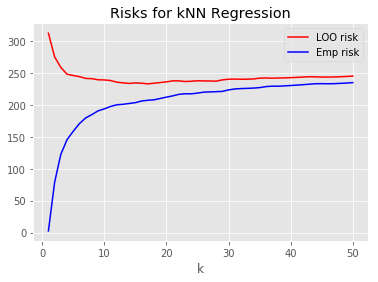

In [9]:
LOOs = []
MSEs = []

Ks = range(1,51)

for k in Ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(X,y,knn))
    MSEs.append(emp_risk(X,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("Risks for kNN Regression")
plt.plot(Ks,MSEs,'b',label="Emp risk")
plt.legend()
_ = plt.xlabel('k')


In [12]:
print("LOO risk for kNN with k=50 is %.2f" %LOOs[-1])
print("Minimal LOO risk for kNN is %.2f for k=%s" %(min(LOOs),np.argmin(LOOs)))
print("Emp risk for kNN with k=50 is %.2f" %MSEs[-1])

LOO risk for kNN with k=50 is 245.26
Minimal LOO risk for kNN is 233.19 for k=16
Emp risk for kNN with k=50 is 235.09


__Remarks__

Emperical risk represents the bias of our model, and the difference between LOO and Emp risks represents the variance. 

As we can see from the graph, for small values of $k = 1,2,3$, the bias is small due to the small expectaion of error on the training set. On the other hand, the variance is big due to the small amount of training data involved in the prediction.

For lager $k > 20$, the variance is getting lower while the bias is getting bigger.

Note that the optimal $k$ in terms of LOO risk is 16, so for that value of $k$ we have a balance of bias and variance.

Compared to the linear regression, which is very biased and has low variance, kNN performes worse for very small or very big $k$, but shows an improvement for optimal value $k=16$: 

LOO risk is 243 for linear regression and 233 for kNN with $k=16$.

__Exercise 2.3__ (10 pts) Implement forward stepwise regression (ESL section 3.3.2) for the linear model and compare the LOO risk for each stage.  Recall that at each step forward stepwise regression will select a new variable that most improves the empirical risk and include that in the model (starting with the intercept).

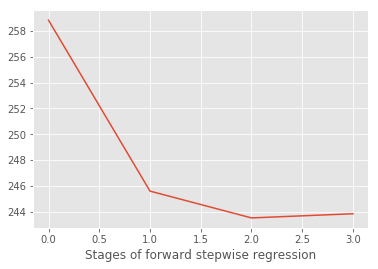

In [38]:
loc_ind = []
risks = []

lin = linear_model.LinearRegression()

for _ in range(4):
    min_risk = float('inf')
    leftover_ind = [i for i in range(4) if i not in loc_ind]
    for index in leftover_ind:
        curr_risk = loo_risk(X[:,loc_ind + [index]], y, lin)
        if curr_risk < min_risk:
            min_risk = curr_risk
            min_index = index
    risks.append(min_risk)
    loc_ind.append(min_index)
    print 
    
plt.plot(risks)
_ = plt.xlabel('Stages of forward stepwise regression')

In [48]:
for i in range(4):
    print("After stage %s, LOO risk is %.2f, with indices " %(i+1,risks[i]) + str(loc_ind[:i+1]) + " used")


After stage 1, LOO risk is 258.84, with indices [3] used
After stage 2, LOO risk is 245.59, with indices [3, 1] used
After stage 3, LOO risk is 243.51, with indices [3, 1, 2] used
After stage 4, LOO risk is 243.83, with indices [3, 1, 2, 0] used


__Remarks__

Notice that the LOO risk on the last stage is bigger then the LOO risk on the 3rd stage. That means that including the first column of $X$ (corresponding to the density value in our dataset) makes prediction worse, and thus we can conclude that density value does not affect the quality value.

On the other hand, considering only the last column of $X$ (corresponding to the time value) is enough to make the LOO risk close to the optimal (258.84 for column 3 vs 243.51 for optimal combination of predictors). Thus the time value is closely related to the quality value.

Considering that our dataset is probably the dataset of different wines, our conclusions agree with common sense that time affects the quality of wine the most (out of density, pH, alcohol and time variables).